mounting drive


In [16]:
pip install rasterio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
import rasterio.warp
import rasterio.shutil
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import plotting_extent
from rasterio.plot import show_hist
from rasterio.mask import mask
from rasterio.merge import merge
from rasterio import Affine, MemoryFile
from rasterio.enums import Resampling
from rasterio import plot

visualizing all bands


In [3]:
#ASSIGNING BANDS
b1= "D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_B01_20m.jp2"
b2= "D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_B02_20m.jp2"
b3= "D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_B03_20m.jp2"
b4="D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_B04_20m.jp2"
b5="D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_B05_20m.jp2"
b6="D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_B06_20m.jp2"
b7="D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_B07_20m.jp2"
b8="D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_B8A_20m.jp2"
b11="D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_B11_20m.jp2"
b12="D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_B12_20m.jp2"

#OPENING BANDS VIA RESTERIO OPEN
b1_r=rio.open(b1)
b2_r=rio.open(b2)
b3_r=rio.open(b3)
b4_r=rio.open(b4)
b5_r=rio.open(b5)
b6_r=rio.open(b6)
b7_r=rio.open(b7)
b8_r=rio.open(b8)
b11_r=rio.open(b11)
b12_r=rio.open(b12)

In [9]:
bSCI="D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_SCL_20m.jp2"
bWVP="D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_WVP_20m.jp2"
BAOT="D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_AOT_20m.jp2"
TCI="D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_TCI_20m.jp2"


bsci_r=rio.open(bSCI)
bwvp_r=rio.open(bWVP)
baot_r=rio.open(BAOT)
bTCI_r=rio.open(TCI)


bTCI_r.shape

(5490, 5490)

In [14]:
#USING AN EMPTY ARRAY TO STORE BAOT,BWVP,BSCI,BTCI EAXH 
arr = []
arr.append(b12_r.read(1))
arr.append(baot_r.read(1))
arr.append(bwvp_r.read(1))
arr.append(bsci_r.read(1))
arr.append(bTCI_r.read(1))
arr.append(bTCI_r.read(2))
arr.append(bTCI_r.read(3))

#STACK FUNCTION FOR STORING

stacked_im = np.stack(arr)
stacked_im.shape

(7, 5490, 5490)

Text(0.5, 1.0, 'Band-12')

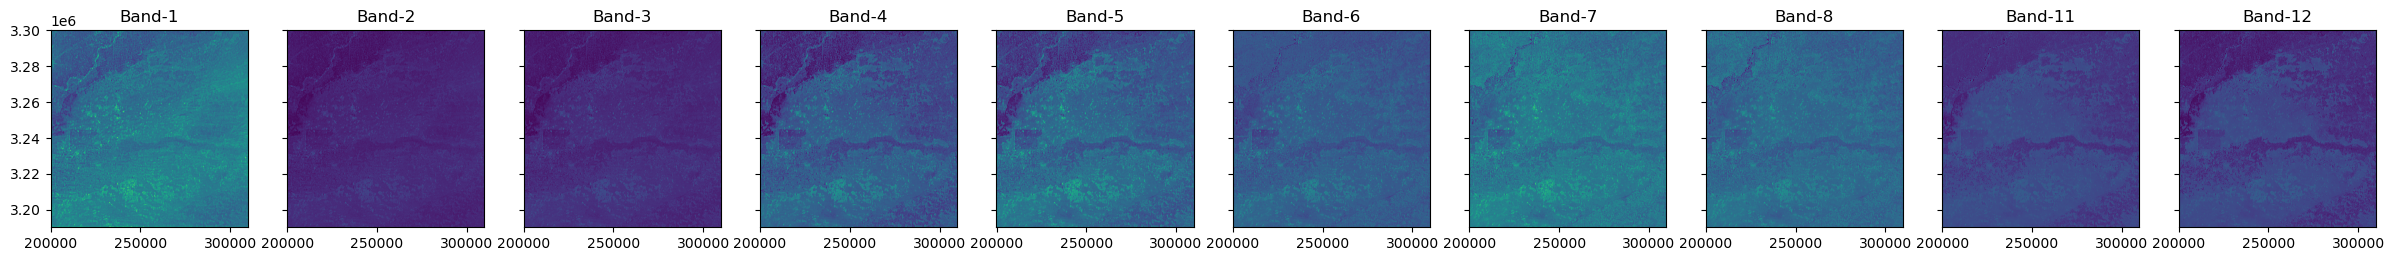

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax10, ax11) = plt.subplots(ncols=10, nrows=1, figsize=(30, 10), sharey=True)


# Plot 10 bands
show(b1_r, ax=ax1)
show(b2_r, ax=ax2)
show(b3_r, ax=ax3)
show(b4_r, ax=ax4)
show(b5_r, ax=ax5)
show(b6_r, ax=ax6)
show(b7_r, ax=ax7)
show(b8_r, ax=ax8)
show(b11_r, ax=ax10)
show(b12_r, ax=ax11)


# Add titles
ax1.set_title("Band-1")
ax2.set_title("Band-2")
ax3.set_title("Band-3")
ax4.set_title("Band-4")
ax5.set_title("Band-5")
ax6.set_title("Band-6")
ax7.set_title("Band-7")
ax8.set_title("Band-8")
ax10.set_title("Band-11")
ax11.set_title("Band-12")




Text(0.5, 1.0, 'Band-TCI')

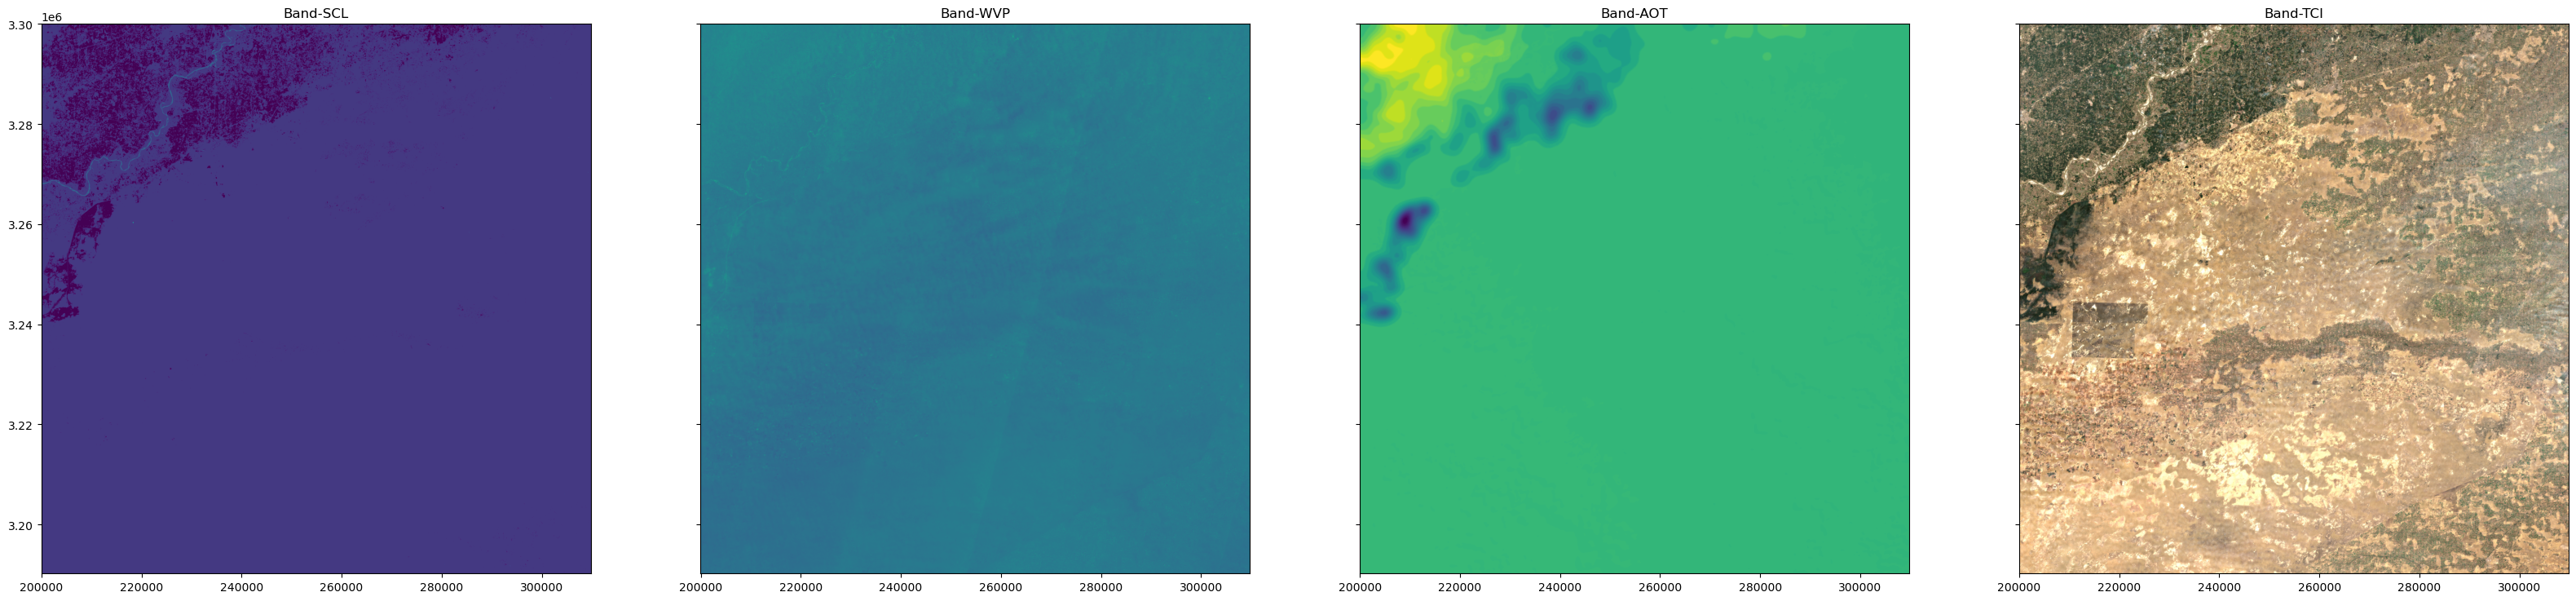

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax12,ax13,ax14,ax15) = plt.subplots(ncols=4, nrows=1, figsize=(40, 10), sharey=True)

#PLOT BANDS
show(bsci_r, ax=ax12)
show(bwvp_r, ax=ax13)
show(baot_r, ax=ax14)
show(bTCI_r, ax=ax15)


ax12.set_title("Band-SCL")
ax13.set_title("Band-WVP")
ax14.set_title("Band-AOT")
ax15.set_title("Band-TCI")

using globe to show list of content in dataset


In [17]:
from glob import glob


In [21]:
glob ("D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\*")

['D:\\Semester05\\ES304\\Project\\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\\GRANULE\\L2A_T43RBN_A034966_20231116T055536\\IMG_DATA\\R20m\\T43RBN_20231116T055109_AOT_20m.jp2',
 'D:\\Semester05\\ES304\\Project\\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\\GRANULE\\L2A_T43RBN_A034966_20231116T055536\\IMG_DATA\\R20m\\T43RBN_20231116T055109_B01_20m.jp2',
 'D:\\Semester05\\ES304\\Project\\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\\GRANULE\\L2A_T43RBN_A034966_20231116T055536\\IMG_DATA\\R20m\\T43RBN_20231116T055109_B02_20m.jp2',
 'D:\\Semester05\\ES304\\Project\\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\\GRANULE\\L2A_T43RBN_A034966_202311

making list of band 2,3,4,5


In [23]:
multi_bands=glob( "D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\*B0[2:3:4:5]*.jp2")


In [24]:
pip install earthpy

     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB 165.2 kB/s eta 0:00:09
     - -------------------------------------- 0.0/1.4 MB 245.8 kB/s eta 0:00:06
     - -------------------------------------- 0.1/1.4 MB 299.4 kB/s eta 0:00:05
     - -------------------------------------- 0.1/1.4 MB 299.4 kB/s eta 0:00:05
     - -------------------------------------- 0.1/1.4 MB 299.4 kB/s eta 0:00:05
     ---- ----------------------------------- 0.2/1.4 MB 484.3 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.4 MB 484.3 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.4 MB 428.8 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.4 MB 415.7 kB/s eta 0:00:03
     ------ --------------------------------- 0.2/1.4 MB 450.6 kB/s eta 0:00:03
     ------- -------------------------------- 0.2/1.4 MB 4

In [25]:
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy as et



visualizing band 5


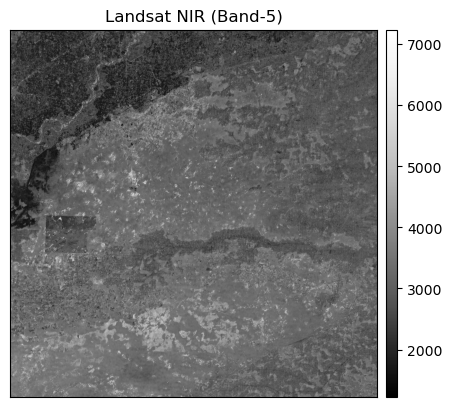

In [26]:
with rio.open(multi_bands[3]) as src:
    landsat_band4 = src.read()

ep.plot_bands(landsat_band4[0],
              title="Landsat NIR (Band-5)",
              scale=False,
              figsize=(5, 6))
plt.show()

CROPING BAND 1

(1, 5490, 5490)
(1, 2990, 2990)


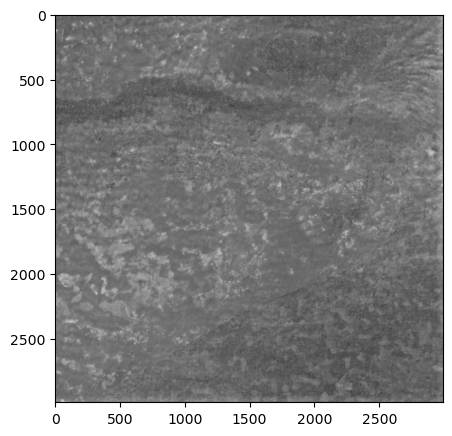

In [11]:
import rasterio
from rasterio.windows import Window
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have opened your raster dataset using rasterio
with rasterio.open('D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_B01_20m.jp2') as src:


    # Read the data within the specified window
    orig_data = src.read()
    print(orig_data.shape)
    # Check the number of bands
    cropped_data=orig_data[:,2500:,2500:]
    print(cropped_data.shape)
    res=np.mean(cropped_data, axis=0)
    plt.figure(figsize=[5,6])
    plt.imshow(res,cmap=plt.cm.gray)

In [31]:
landsat_multi_path ="D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_TCI_20m.jp2"

In [32]:
with rio.open(landsat_multi_path) as src:
    landsat_multi = src.read()

ploting all band using earthpy.plot_bands


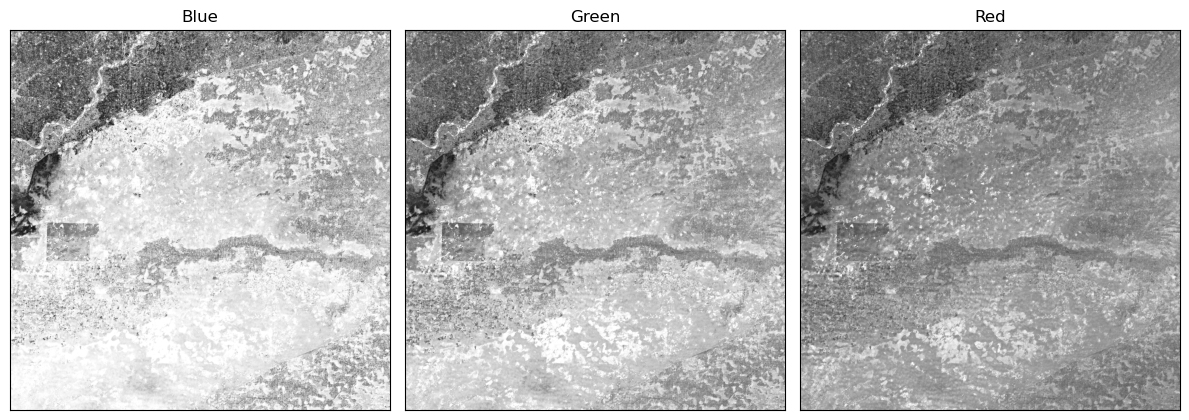

In [34]:
band_titles = ["Blue", "Green", "Red"]
ep.plot_bands(landsat_multi,
              title=band_titles, cbar=False)
plt.show()

concatenate bands


ploting RGB img


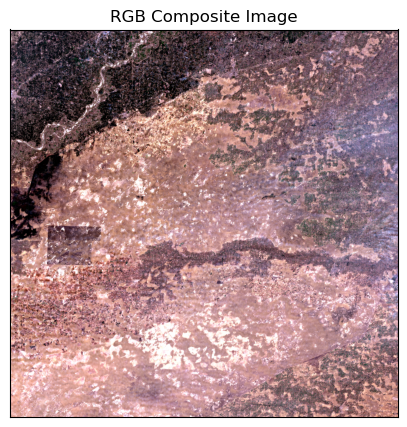

In [48]:
ep.plot_rgb(landsat_multi,
            rgb=[0,1,2],
            stretch=True,
            figsize=(5, 6),
            title="RGB Composite Image")
plt.show()

In [49]:
img = "D:\Semester05\ES304\Project\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\S2B_MSIL2A_20231116T055109_N0509_R048_T43RBN_20231116T082205.SAFE\GRANULE\L2A_T43RBN_A034966_20231116T055536\IMG_DATA\R20m\T43RBN_20231116T055109_TCI_20m.jp2"
with rio.open(img) as src:
    imgTCI = src.read()


In [50]:
imgTCI.shape

(3, 5490, 5490)

converting IMG to grey scale

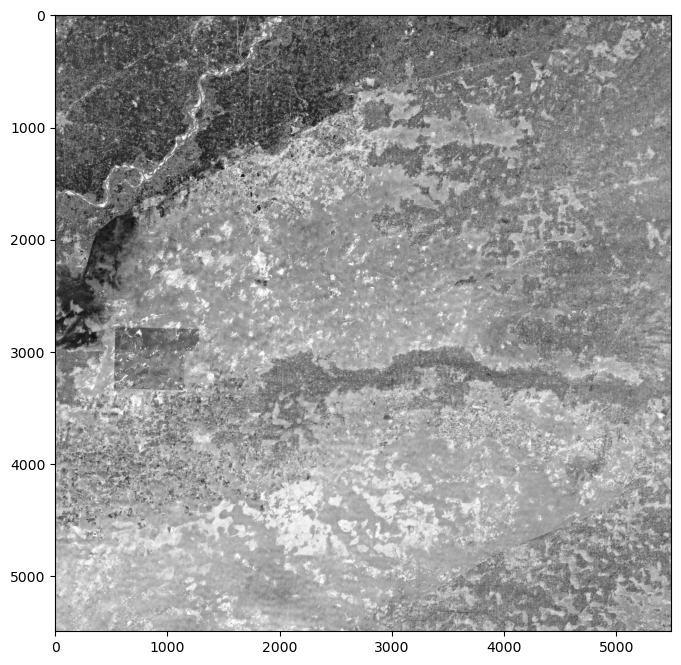

In [120]:
imgtci=np.mean(imgTCI, axis=0)
plt.figure(figsize=[12,8])
plt.imshow(imgtci, cmap=plt.cm.gray)

IMPLEMENTING PCA USING NUMPY

(7, 7)
eigenvectors
[[ 3.77305439e-01 -4.81082959e-01  4.70804198e-01  4.54648029e-01
   3.49049115e-01  2.48425781e-01  1.19531233e-01]
 [ 3.77975956e-01 -4.44774394e-01  1.35841409e-01 -1.87998738e-01
  -4.79260185e-01 -5.16456498e-01 -3.30296627e-01]
 [ 3.78354841e-01 -2.66157210e-01 -3.31539736e-01 -5.07441109e-01
  -1.26940504e-01  4.13990312e-01  4.80719261e-01]
 [ 3.78476012e-01  1.77067817e-04 -5.47840404e-01 -1.42128324e-04
   5.15101066e-01 -3.16847523e-05 -5.39719964e-01]
 [ 3.78354869e-01  2.66262492e-01 -3.31103628e-01  5.07802006e-01
  -1.26631495e-01 -4.14146364e-01  4.80527462e-01]
 [ 3.77976306e-01  4.44667159e-01  1.36039809e-01  1.88266494e-01
  -4.79065281e-01  5.16654390e-01 -3.30179685e-01]
 [ 3.77305991e-01  4.80906058e-01  4.70857060e-01 -4.55135138e-01
   3.48557473e-01 -2.48435841e-01  1.19593097e-01]]
eigenvalues
[6.95384914e+00 2.78116579e-02 1.10114179e-02 4.33478889e-03
 1.87079687e-03 7.75682490e-04 3.46743463e-04]
(30140100, 7)


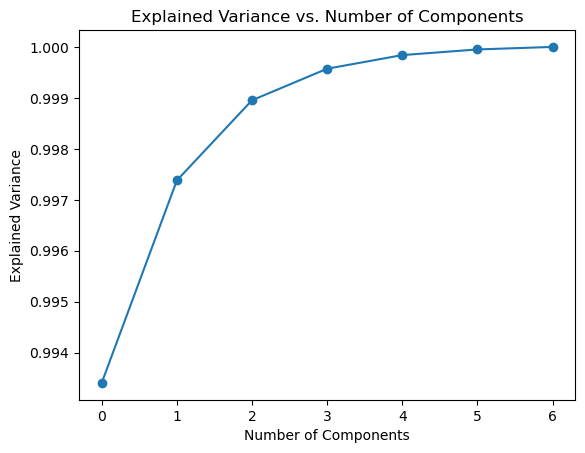

Number of Components: 1, Mean Squared Error: 0.0065930122763210525
Number of Components: 2, Mean Squared Error: 0.0026199184311765816
Number of Components: 3, Mean Squared Error: 0.001046858777905412
Number of Components: 4, Mean Squared Error: 0.00042760324383173847
Number of Components: 5, Mean Squared Error: 0.00016034655791043312
Number of Components: 6, Mean Squared Error: 4.953477787937311e-05
Number of Components: 7, Mean Squared Error: 1.1059254896352682e-28


In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Step 1: Center the data


reshaped=stacked_im.reshape(-1, stacked_im.shape[0])
mean_value = np.mean(reshaped,axis=0)
centered_data=(reshaped -mean_value)/np.std(reshaped,axis=0)
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)
print(cov_matrix.shape);
# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print('eigenvectors')
print(eigenvectors)
print('eigenvalues')

print(eigenvalues)
# Step 5: Choose the number of components
num_components = 7 # Choose the number of components you want to keep

# Step 6: Project the data onto the selected components
projection_matrix = eigenvectors[:, :num_components]
projected_data = reshaped.dot(projection_matrix)

# Step 7: Reconstruct the data
reconstructed_data = projected_data.dot(projection_matrix.T) + mean_value

print(reconstructed_data.shape)

# Plot explained variance
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()
mse1 = []
# Test PCA with different numbers of components
ks=[1,2,3, 4, 5,6, 7]
for n_components in ks:
    projection_matrix = eigenvectors[:, :n_components]
    projected_data = centered_data.dot(projection_matrix)
    reconstructed_data = projected_data.dot(projection_matrix.T)

    # Calculate Mean Squared Error
    mse=mean_squared_error(centered_data, reconstructed_data)
    mse1.append(mse)
    print(f"Number of Components: {n_components}, Mean Squared Error: {mse}")

In [173]:
print(mse1)
print(ks)

[0.0065930122763210525, 0.0026199184311765816, 0.001046858777905412, 0.00042760324383173847, 0.00016034655791043312, 4.953477787937311e-05, 1.1059254896352682e-28]
[1, 2, 3, 4, 5, 6, 7]


using numpy to compute covariance,eigenvectors and values,mean squared error


In [140]:

def reconstructedimg(X, x):

    reshaped=X
    

    centered_data=(reshaped -  np.mean(reshaped,axis=0))/np.std(reshaped,axis=0)
    print(centered_data.shape)
    cov_matrix = np.cov(centered_data, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Step 4: Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
      # Step 5: Choose the number of components
    num_components = x# Choose the number of components you want to keep

    # Step 6: Project the data onto the selected components
    projection_matrix = eigenvectors[:, :num_components]
    projected_data = np.dot(centered_data,projection_matrix)

    # Step 7: Reconstruct the data
    reconstructed_data = np.dot(projected_data, projection_matrix.T)
    return reconstructed_data


using differnt no of components to reconstruct the image

plotting no of components against mean squared error


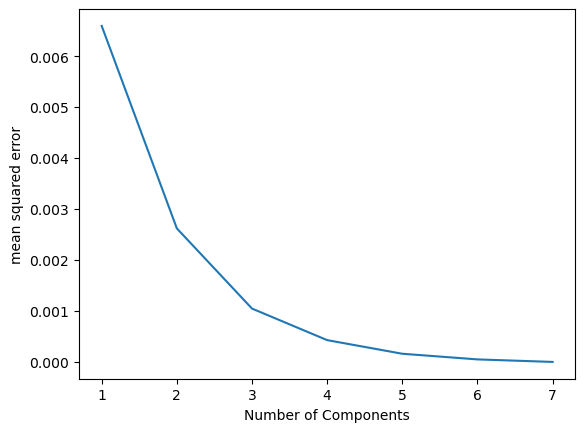

In [174]:
ks = [1,2, 3,4, 5, 6, 7]
mse=[0.0065930122763210525, 0.0026199184311765816, 0.001046858777905412, 0.00042760324383173847, 0.00016034655791043312, 4.953477787937311e-05, 1.1059254896352682e-28]
x= ks
y= mse

plt.plot(x, y)
plt.xlabel('Number of Components')
plt.ylabel('mean squared error')
plt.show()

(7, 5490, 5490)
(5490, 5490)


Text(0.5, 1.0, 'Components: 1')

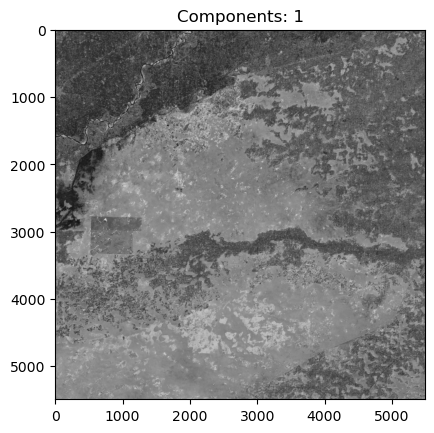

In [167]:
n_components=1
projection_matrix = eigenvectors[:, :n_components]
projected_data = centered_data.dot(projection_matrix)
reconstructed_data = projected_data.dot(projection_matrix.T)

original=stacked_im.shape
recon=reconstructed_data.reshape(original)
print(recon.shape)
print(output.shape)
output=np.mean(recon,axis=0)
plt.imshow(output, cmap='gray')
plt.title("Components: "+str(n_components))

(7, 5490, 5490)
(5490, 5490)


Text(0.5, 1.0, 'Components: 2')

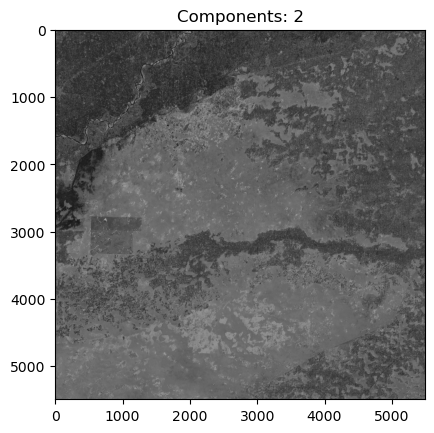

In [161]:
n_components=2
projection_matrix = eigenvectors[:, :n_components]
projected_data = centered_data.dot(projection_matrix)
reconstructed_data = projected_data.dot(projection_matrix.T)

original=stacked_im.shape
recon=reconstructed_data.reshape(original)
print(recon.shape)
print(output.shape)
output=np.mean(recon,axis=0)
plt.imshow(output, cmap='gray')
plt.title("Components: "+str(n_components))

(7, 5490, 5490)
(5490, 5490)


Text(0.5, 1.0, 'Components: 3')

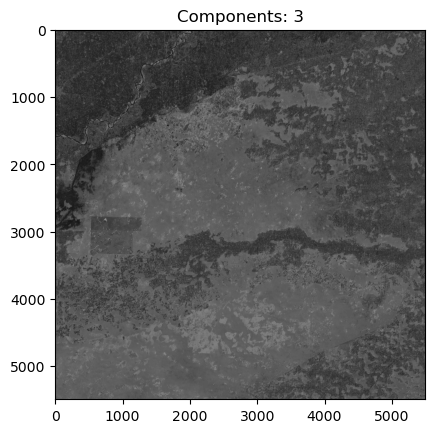

In [162]:
n_components=3
projection_matrix = eigenvectors[:, :n_components]
projected_data = centered_data.dot(projection_matrix)
reconstructed_data = projected_data.dot(projection_matrix.T)

original=stacked_im.shape
recon=reconstructed_data.reshape(original)
print(recon.shape)
print(output.shape)
output=np.mean(recon,axis=0)
plt.imshow(output, cmap='gray')
plt.title("Components: "+str(n_components))

(7, 5490, 5490)
(5490, 5490)


Text(0.5, 1.0, 'Components: 4')

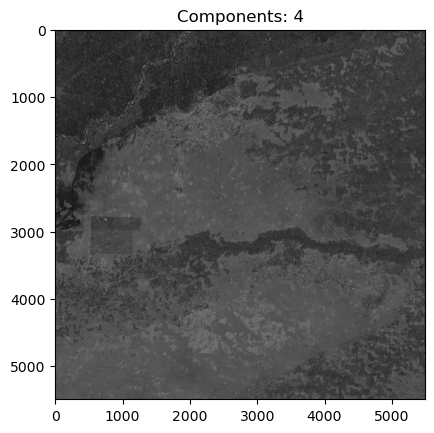

In [163]:
n_components=4
projection_matrix = eigenvectors[:, :n_components]
projected_data = centered_data.dot(projection_matrix)
reconstructed_data = projected_data.dot(projection_matrix.T)

original=stacked_im.shape
recon=reconstructed_data.reshape(original)
print(recon.shape)
print(output.shape)
output=np.mean(recon,axis=0)
plt.imshow(output, cmap='gray')
plt.title("Components: "+str(n_components))

(7, 5490, 5490)
(5490, 5490)


Text(0.5, 1.0, 'Components: 5')

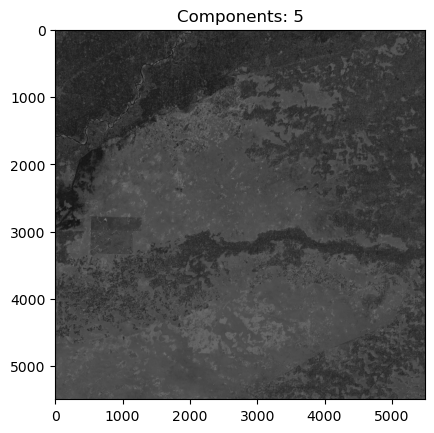

In [164]:
n_components=5
projection_matrix = eigenvectors[:, :n_components]
projected_data = centered_data.dot(projection_matrix)
reconstructed_data = projected_data.dot(projection_matrix.T)

original=stacked_im.shape
recon=reconstructed_data.reshape(original)
print(recon.shape)
print(output.shape)
output=np.mean(recon,axis=0)
plt.imshow(output, cmap='gray')
plt.title("Components: "+str(n_components))

(7, 5490, 5490)
(5490, 5490)


Text(0.5, 1.0, 'Components: 6')

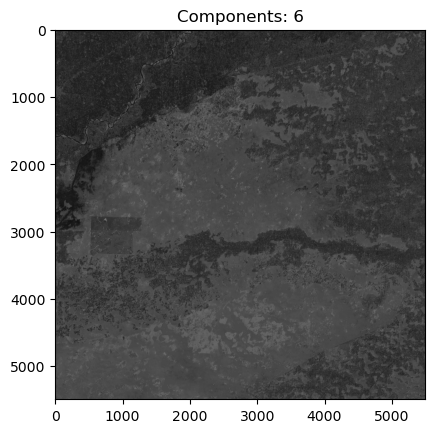

In [165]:
n_components=6
projection_matrix = eigenvectors[:, :n_components]
projected_data = centered_data.dot(projection_matrix)
reconstructed_data = projected_data.dot(projection_matrix.T)

original=stacked_im.shape
recon=reconstructed_data.reshape(original)
print(recon.shape)
print(output.shape)
output=np.mean(recon,axis=0)
plt.imshow(output, cmap='gray')
plt.title("Components: "+str(n_components))

(7, 5490, 5490)
(5490, 5490)


Text(0.5, 1.0, 'Components: 7')

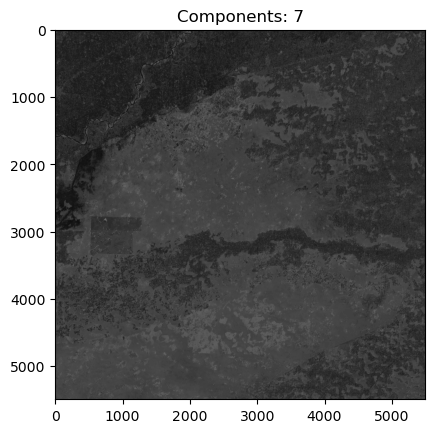

In [166]:
n_components=7
projection_matrix = eigenvectors[:, :n_components]
projected_data = centered_data.dot(projection_matrix)
reconstructed_data = projected_data.dot(projection_matrix.T)

original=stacked_im.shape
recon=reconstructed_data.reshape(original)
print(recon.shape)
print(output.shape)
output=np.mean(recon,axis=0)
plt.imshow(output, cmap='gray')
plt.title("Components: "+str(n_components))